In [1]:
import sys
import numpy as np
import pandas as pd
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

"""
for column_name in train_data.columns:
    if train_data[column_name].dtype == object:
        train_data[column_name] = le.fit_transform(train_data[column_name])
    else:
        pass
"""

#
# Data preprocessing
#
feature_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']

# import the training dataset and transform it to a dataframe
df = pd.read_csv('kddcup.data_10_percent.txt', error_bad_lines=False, low_memory=False).drop_duplicates()
df.columns = feature_names

# remove some features (feature selection)
# remove some feature field if I don't actually understand what does it mean (e.g., num_compromised)
# remove 'target' since we're going to create the training set
# X: The traing set (i.e., x_train)
X = df.drop(columns=['num_compromised', 'target'])

#
# Way to know all the values for a specific field is using df.drop_duplicates() method
#
#print(X['service'].drop_duplicates())

# Since the values in 'service' is str, which is an "object" dtype and 
# need to be converted to numerical values before invoking fit() function
le = LabelEncoder()
if X['service'].dtype == object:
    X['service'] = le.fit_transform(X['service'])


# mapping feature_name string to index numbers
X['protocol_type'] = X['protocol_type'].replace({ 'tcp': 0, 'udp': 1, 'icmp': 2 })
#X['service'] = label_binarize(X['service'], classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])
X['flag'] = X['flag'].replace({ 'SF': 0,'S1': 1,'REJ': 2,'S2': 3,'S0': 4,'S3': 5,'RSTO': 6,'RSTR': 7,'RSTOS0': 8,'OTH': 9,'SH': 10 })

# mapping label names to target names 
# e.g., replace "normal." with "normal"
# y: The corresponding labels to the X. (i.e., y_train)
y = df['target'].replace(to_replace = r'(.*)\.', value = r'\1', regex = True).replace({
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l'
}).replace({ 'normal': 0, 'probe': 1, 'dos': 2, 'u2r': 3, 'r2l': 4 })

# binarize the labels (targets)
Y = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = Y.shape[1]

print(X.shape, y.shape)

b'Skipping line 485798: expected 42 fields, saw 56\n'


(145584, 40) (145584,)


In [2]:
# Test set data preprocessing
test_feature_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

# import the test dataset and transform it to a dataframe
#debug_test_set = pd.read_csv('kddcup.testdata.unlabeled_10_percent.txt', names=test_feature_names, error_bad_lines=False, low_memory=False).drop(columns=['num_compromised'])
test_set = pd.read_csv('kddcup.testdata.unlabeled_10_percent.txt', names=test_feature_names, error_bad_lines=False, low_memory=False)
#test_set.columns = test_feature_names
test_set = test_set.drop(columns=['num_compromised'])

if test_set['service'].dtype == object:
    test_set['service'] = le.fit_transform(test_set['service'])
test_set['protocol_type'] = test_set['protocol_type'].replace({ 'tcp': 0, 'udp': 1, 'icmp': 2 })
test_set['flag'] = test_set['flag'].replace({ 'SF': 0,'S1': 1,'REJ': 2,'S2': 3,'S0': 4,'S3': 5,'RSTO': 6,'RSTR': 7,'RSTOS0': 8,'OTH': 9,'SH': 10 })

target_col = ['target']
correct_data = pd.read_csv('corrected', names=(test_feature_names + target_col), usecols=target_col, error_bad_lines=False, low_memory=False).replace(to_replace = r'(.*)\.', value = r'\1', regex = True).replace({
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
    'snmpgetattack': 'r2l',
    'named': 'r2l',
    'xlock': 'r2l',
    'xsnoop': 'r2l',
    'sendmail': 'r2l',
    'saint': 'probe',
    'apache2': 'dos',
    'udpstorm': 'dos',
    'xterm': 'u2r',
    'mscan': 'probe',
    'processtable': 'dos',
    'ps': 'u2r',
    'httptunnel': 'u2r',
    'worm': 'r2l',
    'mailbomb': 'dos',
    'sqlattack': 'u2r',
    'snmpguess': 'r2l'
}).replace({ 'normal': 0, 'probe': 1, 'dos': 2, 'u2r': 3, 'r2l': 4 })

#print(correct_data)

# binarize the labels (targets)
C_vector = label_binarize(correct_data, classes=[0, 1, 2, 3, 4])
C_n_classes = C_vector.shape[1]

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'protocol_type'}>,
        <AxesSubplot:title={'center':'service'}>,
        <AxesSubplot:title={'center':'flag'}>,
        <AxesSubplot:title={'center':'src_bytes'}>,
        <AxesSubplot:title={'center':'dst_bytes'}>],
       [<AxesSubplot:title={'center':'land'}>,
        <AxesSubplot:title={'center':'wrong_fragment'}>,
        <AxesSubplot:title={'center':'urgent'}>,
        <AxesSubplot:title={'center':'hot'}>,
        <AxesSubplot:title={'center':'num_failed_logins'}>,
        <AxesSubplot:title={'center':'logged_in'}>],
       [<AxesSubplot:title={'center':'root_shell'}>,
        <AxesSubplot:title={'center':'su_attempted'}>,
        <AxesSubplot:title={'center':'num_root'}>,
        <AxesSubplot:title={'center':'num_file_creations'}>,
        <AxesSubplot:title={'center':'num_shells'}>,
        <AxesSubplot:title={'center':'num_access_files'}>],
       [<AxesSubplot:title={'center':'num_outb

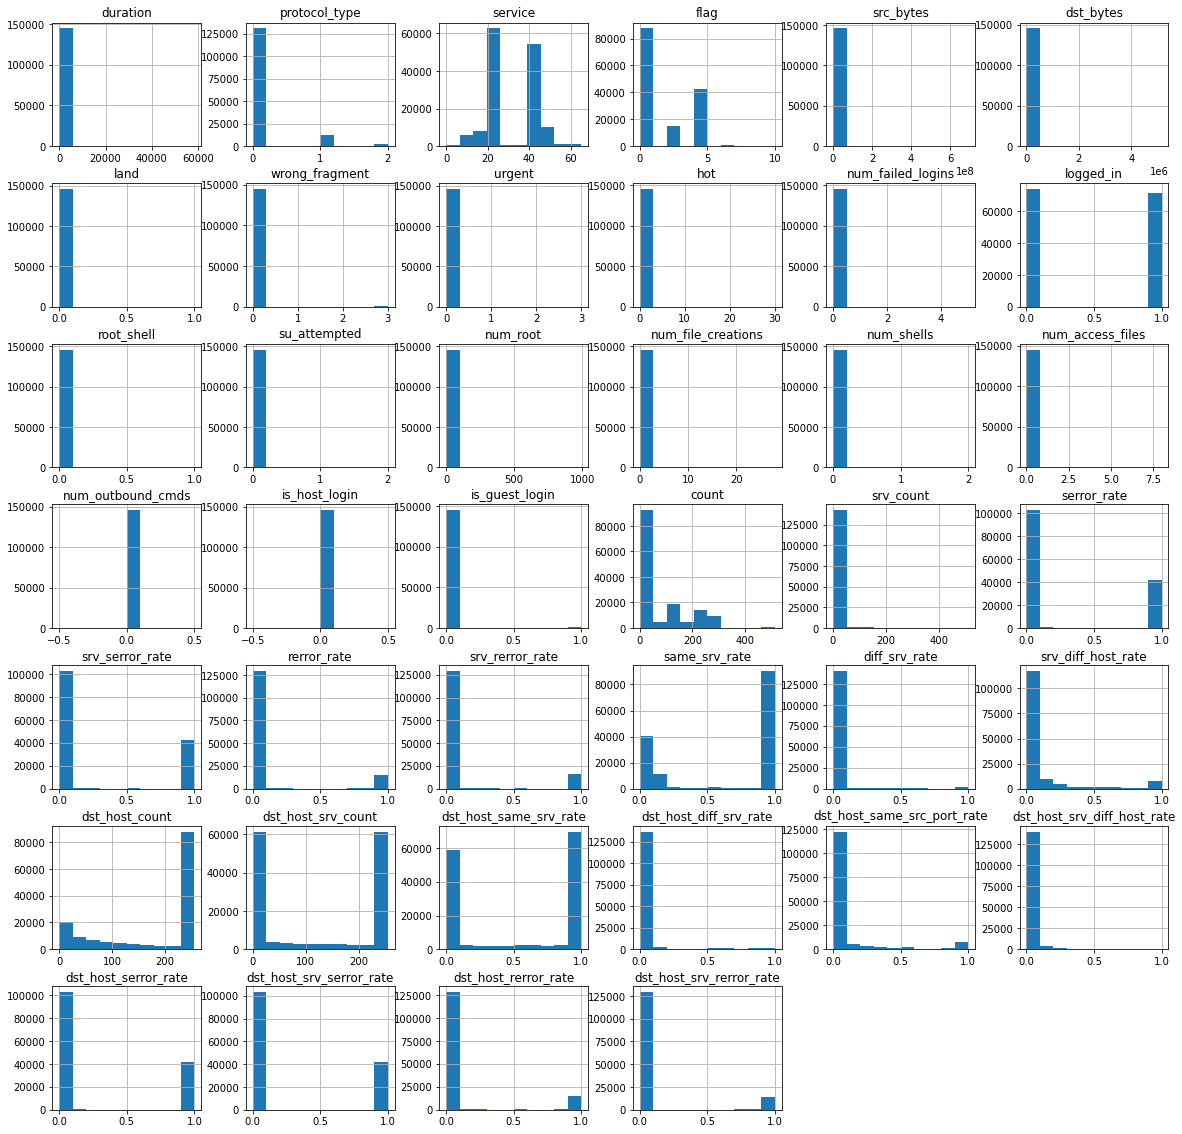

In [3]:
# Visualize the data
import matplotlib.pyplot as plt
X_feature_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'root_shell', 
       'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
X[X_feature_names].hist(figsize=(20,20))

In [4]:
# Do K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y)
print("Scores:", scores)

mean = 0
for score in scores:
    mean += score
mean = mean / 5
print("The average score is: {:.2f}".format(mean))

# Use default value n_split=5 to split dataset
# kf = KFold(n_splits=5)
# Generating training_set and valid_set
# x: for [data]
# y: for [target]

"""
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    print(x_train.shape, x_valid.shape)
    print(y_train.shape, y_vlaid.shape)
"""

Scores: [0.98481986 0.99323419 0.99505444 0.95724147 0.97781289]
The average score is: 0.98


'\nfor train_index, test_index in kf.split(X):\n    print("TRAIN:", train_index, "TEST:", test_index)\n    x_train, x_valid = X[train_index], X[test_index]\n    y_train, y_valid = y[train_index], y[test_index]\n    print(x_train.shape, x_valid.shape)\n    print(y_train.shape, y_vlaid.shape)\n'

In [5]:
# Build an K-NN model 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [6]:
print(test_set.shape) # 'kddcup.testdata.unlabeled_10_percent.txt'
print(correct_data.shape) # 'corrected'

(311029, 40)
(311029, 1)


In [7]:
# Making prediction
prediction = knn.predict(test_set)
print("Predicted label:", prediction)
print(len(prediction))
print("Test set score: {:.2f}".format(knn.score(test_set, correct_data)))

Predicted label: [0 0 0 ... 0 0 0]
311029
Test set score: 0.92


In [8]:
# Plot precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#average_precision = average_precision_score(correct_data, prediction, )

# A "micro-average": quantifying score on all classes jointly
# precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(), y_score.ravel())
# score = knn.predict_proba(test_set)
# average_precision = average_precision_score(correct_data, score)

# print('Average precision score over all classes: {0:0.2f}'.format(average_precision))

In [9]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(correct_data, prediction)

array([[ 60225,    131,    225,      1,     11],
       [   652,   2917,    597,      0,      0],
       [  6411,    215, 223227,      0,      0],
       [    82,     66,     67,     13,      0],
       [ 15804,    367,      9,      0,      9]], dtype=int64)

In [10]:
# Build Naive Bayes model
# from sklearn.naive_bayes import CategoricalNB
# clf = CategoricalNB()
# clf.fit(X, y)

### Due to MemoryError, I discard this algorithm

In [11]:
# Build SVM model
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X, y)
print(svc.coef_)

[[-1.62062852e-05 -8.75226264e-01 -1.53760757e-02 -3.37618574e-01
   4.96876330e-04  2.87850463e-03 -8.87123510e-02 -8.56850281e-01
  -2.24835906e-03 -5.88791184e-01 -4.78925359e-01 -1.23126544e+00
  -3.17942669e-02 -2.93492801e-03  1.21895939e-01 -1.79618977e-01
  -1.40310211e-02 -2.66277213e-02  0.00000000e+00  0.00000000e+00
  -8.71794293e-02 -9.59126835e-03  1.39144803e-03  1.76260780e-03
   9.40309495e-02  3.26226826e-01 -1.34606394e-01  2.11824149e+00
   1.37784801e+00 -3.93319974e-01  7.20457533e-03  1.77942097e-04
   5.20766618e-01 -7.45968509e-01 -7.34339150e-01 -1.46305420e+00
  -4.65124316e-01 -1.62389027e+00 -1.30689849e-01  7.79511562e-02]
 [ 2.61786824e-04  9.90738169e-01  3.63194738e-02  1.18407964e-01
  -3.35970653e-02 -9.61709131e-03 -3.28938768e-01 -3.95345324e-01
   0.00000000e+00  3.21616764e-02 -2.71050543e-20 -2.87395247e-01
   0.00000000e+00  0.00000000e+00  1.01643954e-20  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.0000

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
svc.predict(test_set)
print("Test set score: {:.2f}".format(svc.score(test_set, correct_data)))

Test set score: 0.81


In [13]:
# Build Random Forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10, random_state=0)
rfc.fit(X, y)

RandomForestClassifier(max_depth=10, random_state=0)

In [14]:
rfc.predict(test_set)
print("Test set score: {:.2f}".format(rfc.score(test_set, correct_data)))

Test set score: 0.92
